# SciKit Learn Tutorial 

Exercises from online youtube course, which can be found [here](https://www.youtube.com/watch?v=pqNCD_5r0IU).

This project aims to explore the use of the Scikit learn package for implementing different machine learning algorithms.

## Classification 

A classification model will use the features of an instance to label it into a specific category of other instances with similar features. 


### Data 

The dataset contains data regarding car evaluation. Using this data we will create a classification model to classify the condition of vehicles as one of: unacceptable, acceptable, good or very good. 

This is an example of a classification model using supervised machine learning. 

Features: 
* buying: buying price (categorical)
* maint: price of maintenance (categorical)
* doors: The number of doors (categorical)
* persons: Capacity in terms of persons to carry (categorical)
* lug_boot: The size of the car boot (categorical)
* safety: Estimated safety of the car (categorical)

Target: 
* class: The evaluation level = 'unacceptable', 'acceptable', 'good', 'very good' 

In [129]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import neighbors, metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import accuracy_score
import numpy as np 
import pandas as pd

# Reading in the data and adding column labels 
cars = pd.read_csv('/Users/imogensole/Desktop/Git/Scikit_Learn/car+evaluation/car.data')
cars = cars.set_axis(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], axis=1)

### Train Test Split

In [130]:
# Split the data into features and labels 

X = cars.drop('class', axis='columns').values
y = cars['class']

# splits the data into training and test sets 
# test data = 20% of data set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1381, 6)
(346, 6)
(1381,)
(346,)


**What is KNN?**

* KNN = 'K Nearest Neighbours'
* Type of classification/regression algorithm 
* Divides the data set into regions for different categories of classification based
* Axis represent the features of the data set 

1. Test point plotted based on its features 
2. Identify the K nearest neighbours to the test point 
3. Test point classified in the same category as the majority of the nearest neighbours 

* Larger k is more appropriate for larger datasets 
* Advised to use an odd number for k 
* weights parameter = 'uniform' or 'distance'
    * 'uniform' = all datapoints given equal importance 
    * 'distance' = datapoints weighted higher if they are nearer to the test point 

In [131]:
# Converting the feature strings into numerical 
Le = LabelEncoder()

for i in range(len(X[0])): #iterates over each of the features 
    X[:, i] = Le.fit_transform(X[:,i]) #converts each column


# Converting the target strings into numerical using mapping 
# Create a dictionary for mapping labels 
label_mapping = { 
    'unacc':0, 
    'acc':1, 
    'good':2, 
    'vgood':3
}

y = cars['class']
y = y.map(label_mapping)
y = np.array(y)


In [132]:
# Create the model 
knn = neighbors.KNeighborsClassifier(n_neighbors=25, weights='uniform')

# Creating the train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Training the model 
knn.fit(X_train, y_train)

# Make predictions on test data
prediction = knn.predict(X_test)

# Evaluate the accuracy 
accuracy = metrics.accuracy_score(y_test, prediction)

print("predictions: ", prediction)
print("accuracy: ", accuracy)

# Comparing predicted and actual values 
a = 100
print("actual value: ", y[a])
print("predicted value: ", knn.predict(X)[a])

predictions:  [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 3 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 3 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 3 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
accuracy:  0.7890173410404624
actual value:  0
predicted value:  0


# Support Vector Machine (SVM)

* Effective in high dimensional spaces (= good for modelling with lots of features)
* Many kernel functions
* Classification and regression

*How does it work?*
1. Data points plotted in a plane 
2. SVM creates a **hyperplane** - hyperplane will have 1 dimension fewer than the dimension of the data
3. The **support vectors** = the points in each category closest to the hyperplane 
4. Calculates the distance between the support vectors and the hyperplane = the **margin**
5. The hyperplane is optimised by making the margin as large as possible 

Can use different kernels to create different separation boundaries. 
* Linear 
* Polynomial 
* Exponential 
* Sigmoid = returns values between 0 and 1

In [133]:
# Creating the train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# The different classes of car quality 
classes = ['unacc', 'acc', 'good', 'vgood']

# Create the svm model 
model = svm.SVC()

# Train the model 
model.fit(X_train, y_train)

# Make predictions 
predictions = model.predict(X_test)

# Evaluate accuracy 
acc = accuracy_score(y_test, predictions )

# Print the predictions and accuracy
print("predictions: ", predictions)
print("actual: ", y_test)
print("acccuracy: ", acc)


predictions:  [0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 1 0 0 2 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 0 0
 0 0 0 0 1 1 0 0 3 0 1 0 0 1 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 1 0 1 0 3 3 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 3 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 2 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 3 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0
 1 1 0 0 0 1 0 1 0 0 0 1 0]
actual:  [0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 1 1 0 2 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 2 1 0 0 0 0 0 0
 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 0 0
 0 0 0 0 1 1 0 0 3 0 2 0 0 1 0 0 0 0 0 0 0 1 2 0 

# Linear Regression 

## About the Data 

The dataset used contains house prices for King County, USA and can be downloaded [here](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?resource=download). It includes properties sold between May 2014 and May 2015. The regression goal is to predict house prices based on the following input variables. 

# Input Variables 

* bedrooms: The number of bedrooms in the property (integer). 
* bathrooms: The number of bathrooms in the property (integer). 
* sqft_living: The size of the living room in square feet (numeric). 
* sqft_lot: The total size of the property in square feet (numeric).
* floors: The number of floors in the property (integer). 
* waterfront: Takes value 0 if the property is not located on a waterfront and 1 if the property is located on a waterfront (integer). 
* view: A rating between 1 and 4 based on the view from the property (integer). 
* condition: Rating out of five indicating the condition of the property (integer).
* sqft_above: The size of the above ground property in square feet (numeric). 
* sqft_basement: The size of the basement in square feet (numeric). 
* yr_built: The year the property was built (integer).
* yr_renovated: The year the property was last renovated (integer). 
* zipcode: The zipcode of the house (integer).
* lat: the latitude coordinates of the property (numeric). 
* long: the longitude coordinates of the property (numeric). 



# Predict Variable
* price: The dolar amount the property sold for (numeric). 


In [134]:
# Importing dataset 
from sklearn import linear_model 
from matplotlib import pyplot as plt 

# Read in regression data 
houses = pd.read_csv('kc_house_data.csv')
houses = houses.dropna()
houses = houses.drop(columns=["id", "sqft_living15","sqft_lot15","date",'zipcode','lat','long'])

# Define the features / labels 
X = houses.drop('price', axis=1)
y = houses['price']

# Create linear reg model 
l_reg = linear_model.LinearRegression()

# Visualising the data

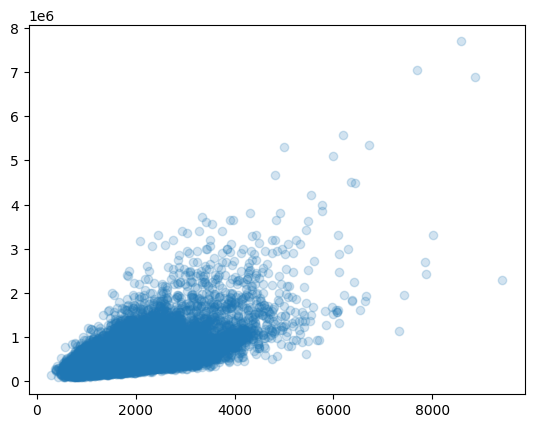

In [141]:
plt.scatter(X['sqft_above'], y, alpha=0.2)
plt.show()

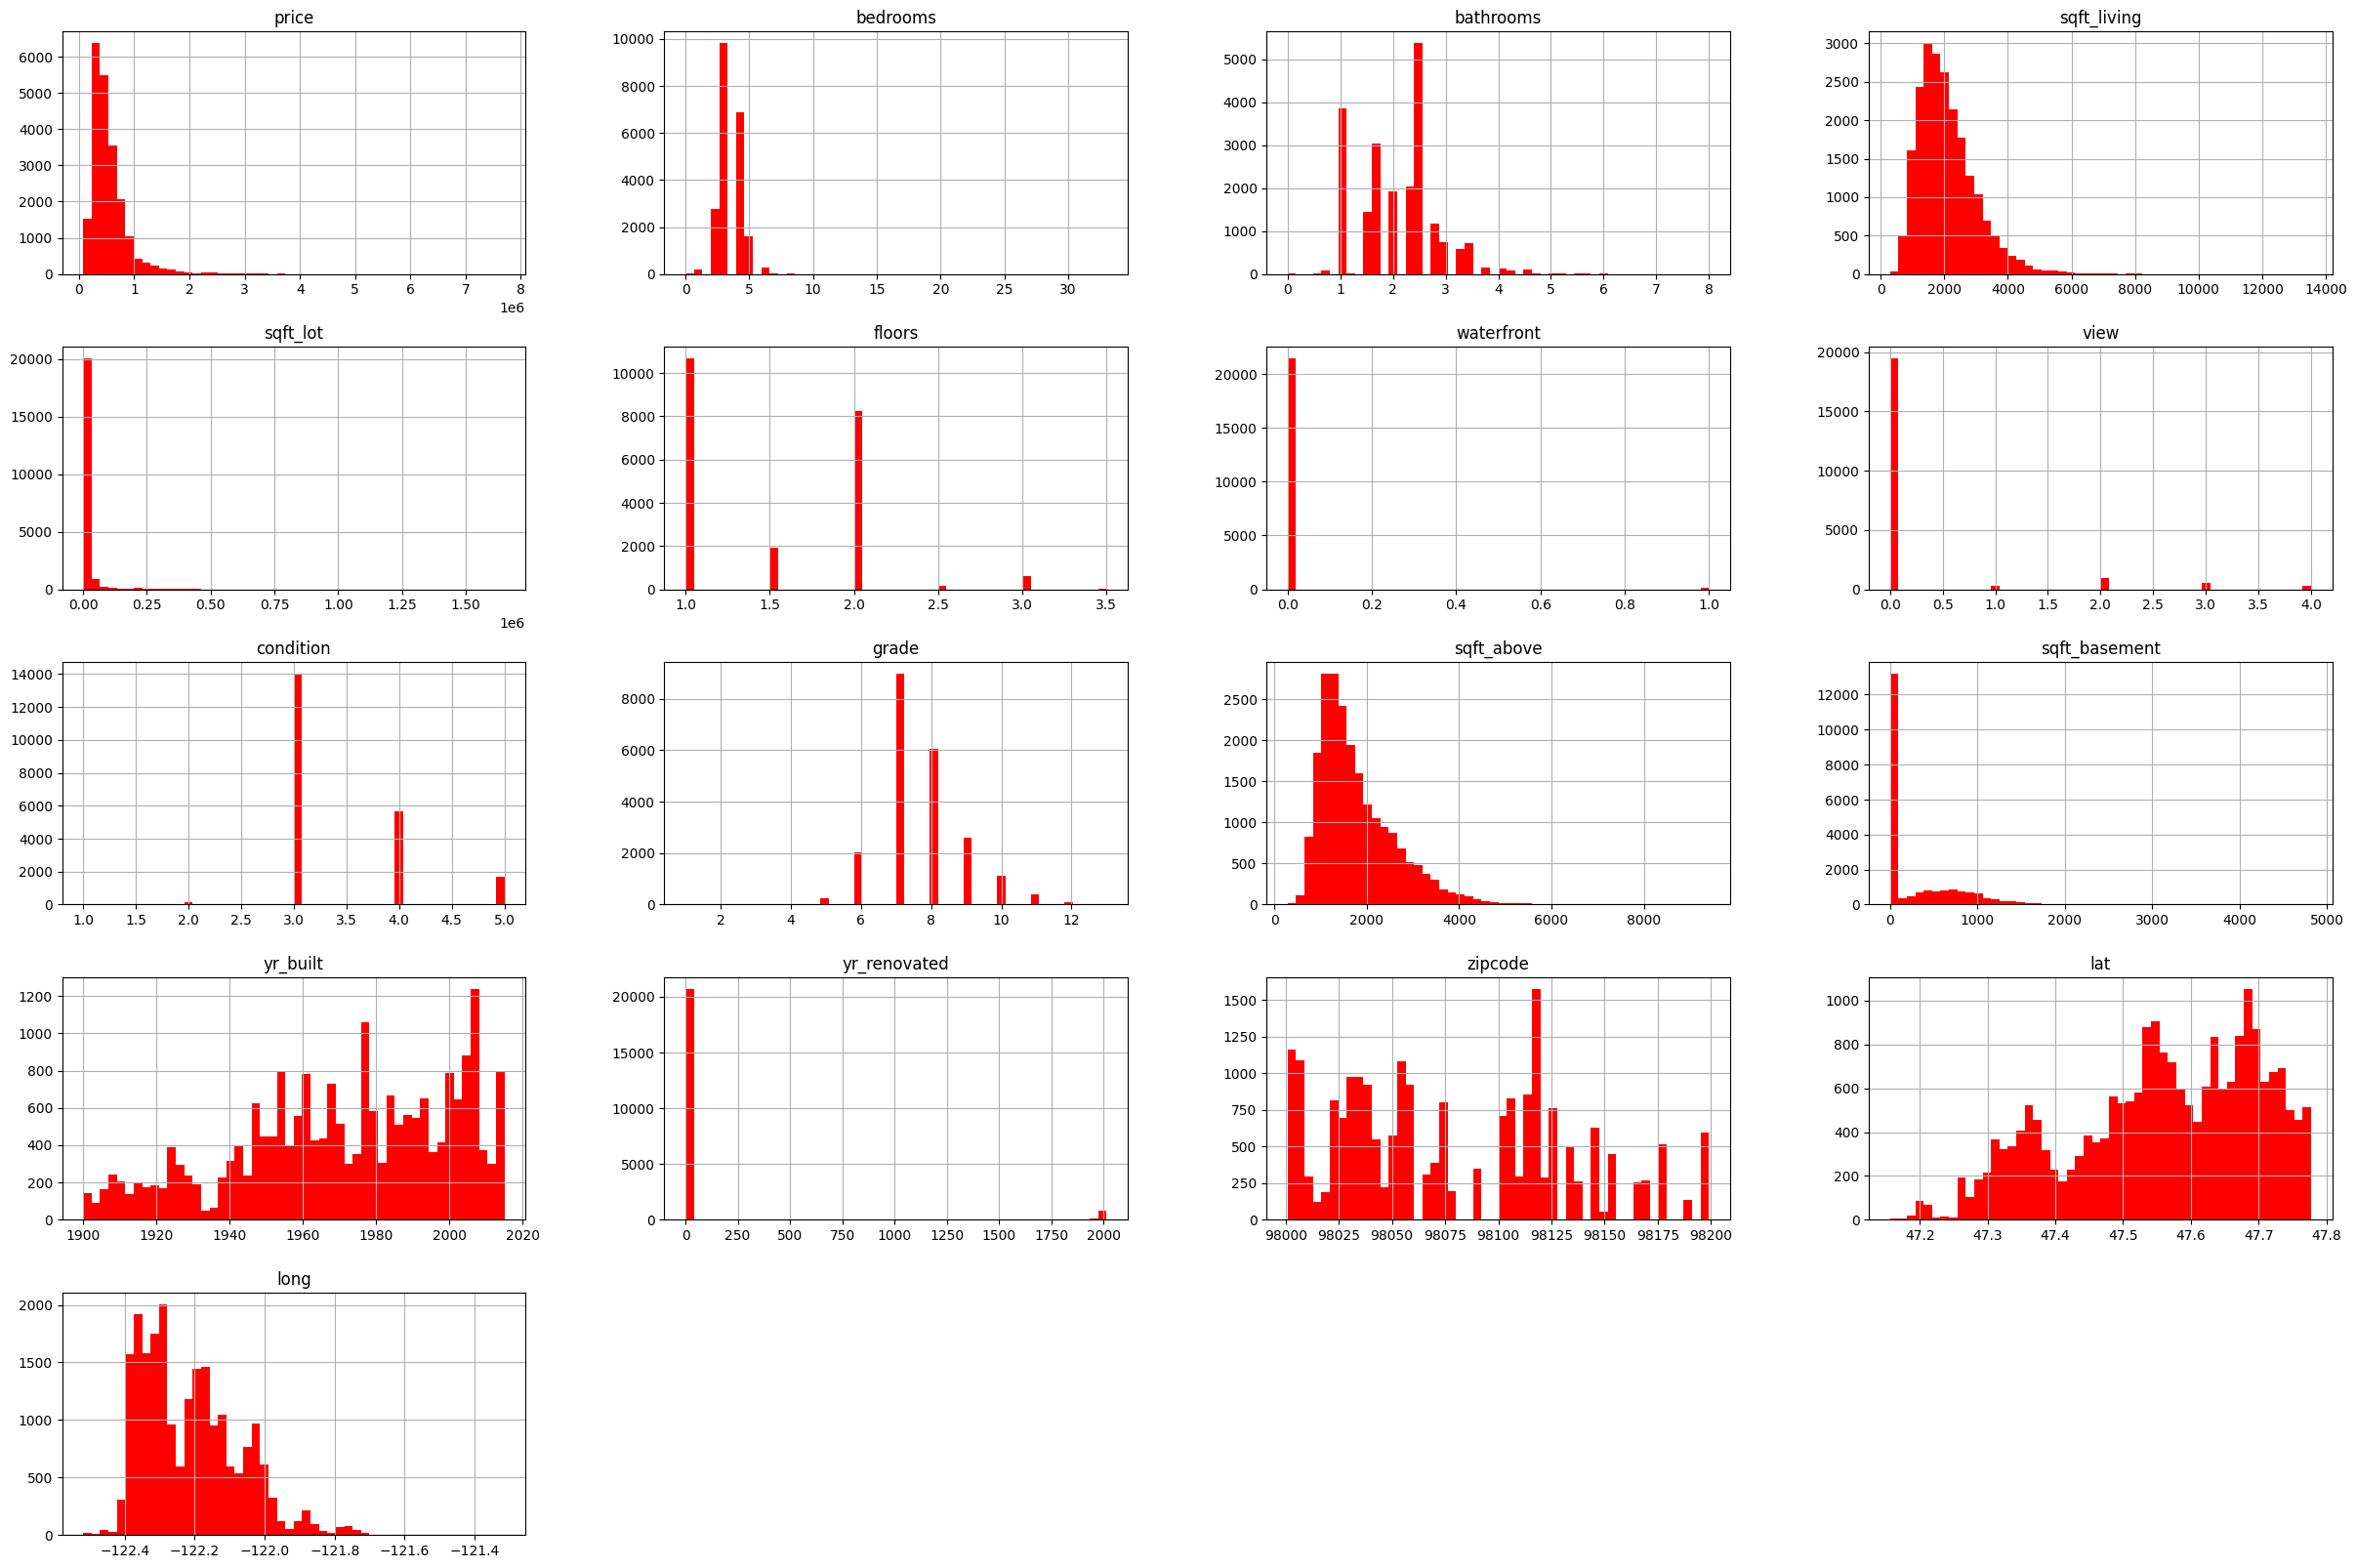

In [136]:
%matplotlib inline 
data.hist(bins=50, figsize=(30,20), color="red")
plt.show()

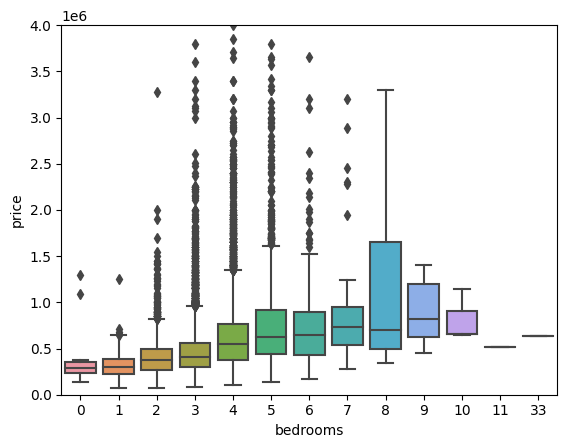

In [137]:
import seaborn as sns

# Boxplot showing how the price varies for different number of bedrooms 
fig1,ax1 = plt.subplots()
ax1.set_ylim(0, 4000000)
sns.boxplot(x="bedrooms", y="price", data=data, ax=ax1)

plt.show()

<Axes: xlabel='bathrooms', ylabel='price'>

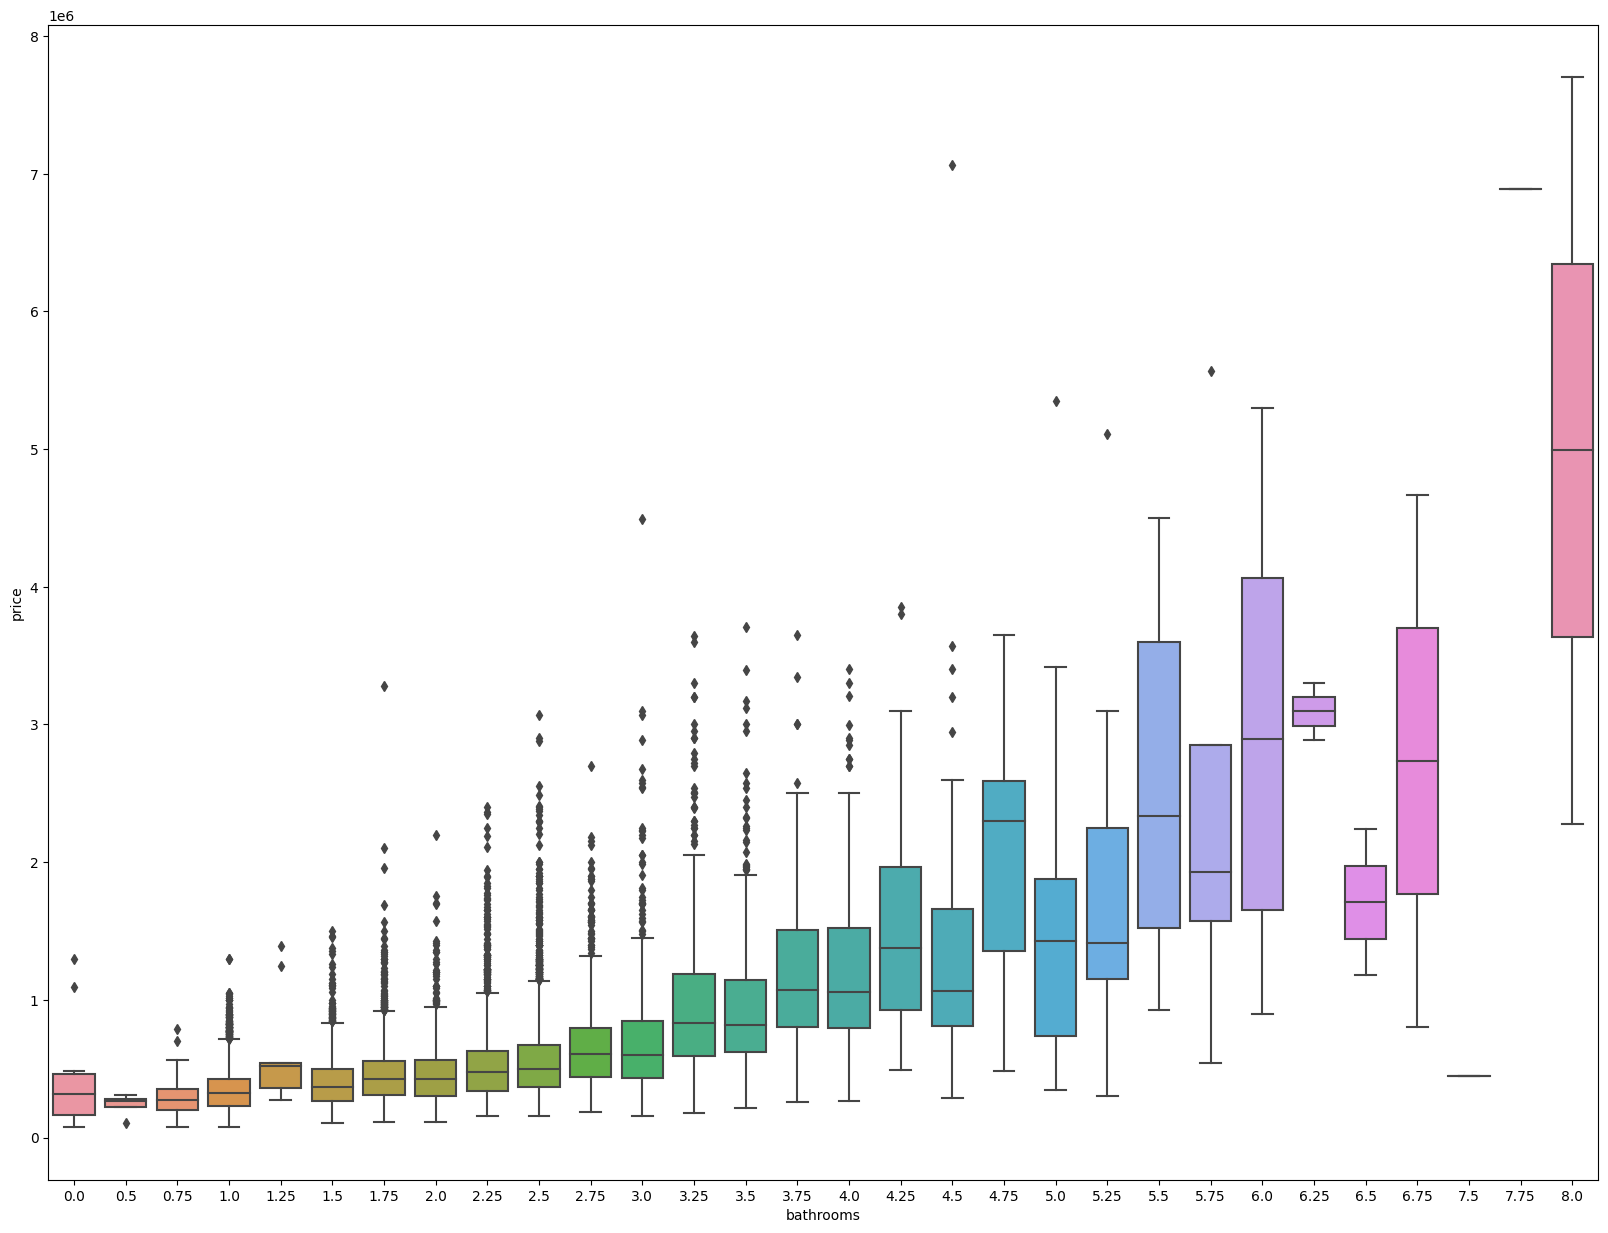

In [138]:
# Boxplot showing how the price varies for different number of bathrooms
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(x="bathrooms", y="price", data=data)

<Axes: xlabel='floors', ylabel='price'>

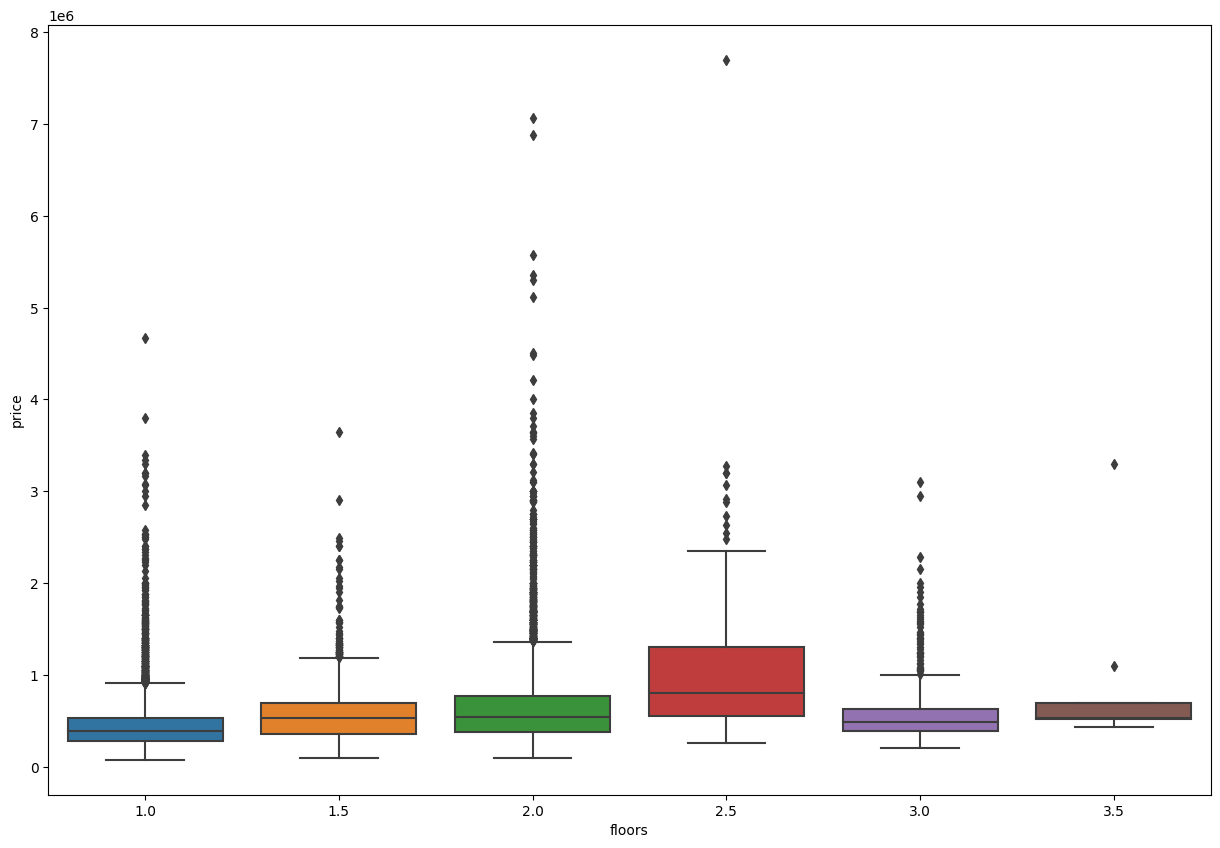

In [139]:
# Boxplot showing how the price varies for different number of floors
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x="floors", y="price", data=data)

In [150]:
# Train test split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# train the model 
model = l_reg.fit(X_train, y_train)

# predict for test data
predictions = model.predict(X_test)

# Results 
print("predictions: ", predictions)
print("R^2 value: ", l_reg.score(X,y))
print("model coefficients: ", l_reg.coef_)
print("model intercept: ", l_reg.intercept_)

predictions:  [283794.65635168 350565.31712509 270794.55207236 ... 346330.82445101
 451272.48281365 744008.76797027]
R^2 value:  0.6522176465467729
model coefficients:  [-3.92544755e+04  4.60255332e+04  1.15098250e+02 -2.25512142e-01
  2.38532692e+04  5.81151552e+05  4.49852069e+04  1.82002935e+04
  1.24661411e+05  5.75723381e+01  5.75259111e+01 -3.62329102e+03
  7.56191673e+00]
model intercept:  6293726.295903141
